In [84]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
mpl.rcParams['figure.figsize'] = (20,5)

In [148]:
jewelry = pd.read_csv('Documents\\Python Scripts\\jewelry.csv', header=0, parse_dates=['event_time'])

#for c in jewelry.columns:
 #   x = str(len(pd.unique(jewelry[c])))
  #  y = str(jewelry[c].isnull())
   # print('Column: ' + c)
    #print(jewelry[c].unique())
    #print('Unique: ' + x, 'Null: ' + y)

# Data Cleansing

In [149]:
#Remove 397 NULL values in the price column that were not meant to be used for analysis.
#They are also Null in category and user id, and contained anomalous data in the other columns.
jewelry = jewelry.dropna(subset = ['price'])

#Remove redundant category name from category_code column.
jewelry['category_code'] = jewelry['category_code'].str.replace('jewelry.', '').str.replace('electronics.', '')

#Fill in blanks and simplify color column- change null and 'unknown-color' to 'unknown'
clrmapping = {'unknown-color':'unknown', np.nan:'unknown'}
jewelry['color'] = jewelry['color'].replace(clrmapping) 

#Fill in blanks in gem column- change null values to none
jewelry['gem'] = jewelry['gem'].fillna('none')

#Change datatypes for select columns
jewelry['category_id'] = jewelry['category_id'].apply(np.int64)
jewelry['brand'] = jewelry['brand'].astype(str)
jewelry['user_id'] = jewelry['user_id'].apply(np.int64)

print(jewelry.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112905 entries, 0 to 113301
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   event_time     112905 non-null  datetime64[ns, UTC]
 1   order_id       112905 non-null  int64              
 2   product_id     112905 non-null  int64              
 3   quantity       112905 non-null  int64              
 4   category_id    112905 non-null  int64              
 5   category_code  103277 non-null  object             
 6   brand          112905 non-null  object             
 7   price          112905 non-null  float64            
 8   user_id        112905 non-null  int64              
 9   gender         62223 non-null   object             
 10  color          112905 non-null  object             
 11  metal          112851 non-null  object             
 12  gem            112905 non-null  object             
dtypes: datetime64[ns, UTC](1), fl

## Product

Text(0.5, 0.98, 'Jewelry Sold by Category')

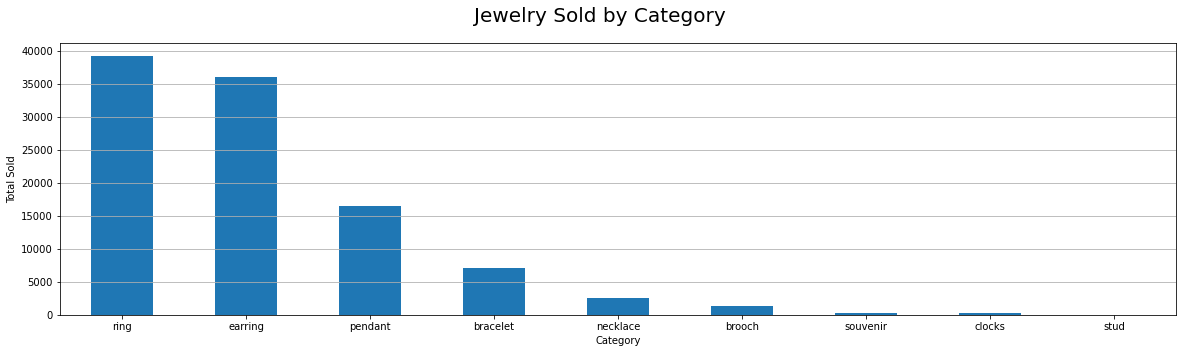

In [124]:
category = jewelry['category_code'].value_counts()

category.plot(kind = 'bar', xlabel = 'Category', ylabel = 'Total Sold', rot = 0).grid(axis='y')
plt.suptitle('Jewelry Sold by Category', fontsize=20)

<class 'pandas.core.frame.DataFrame'>


<AxesSubplot:>

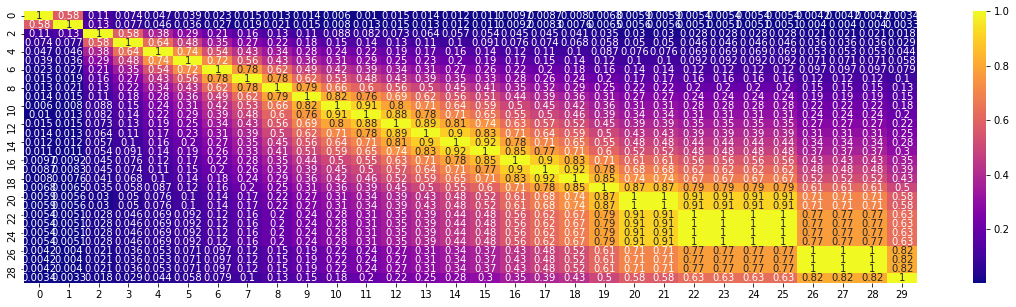

In [309]:
# Trying to see which categories are correlated with one another

# Get just orders that are duplicates
d = jewelry['order_id'].duplicated(keep=False)
duplicates = jewelry[d == True]

# Make a df of just duplicated orders and category codes
copy = pd.concat([duplicates['order_id'], duplicates['category_code']], axis = 1)

# Group the duplicated df by orders
group = copy.groupby('order_id')

# Change the column with a single list of categories to multiple columns(one for each item)  
copy_list = group.apply(lambda x: list(x['category_code']))
copy_list = copy_list.apply(pd.Series)

#Change categries to numbers (1 or 0)
copy_list = copy_list.fillna(0)
copy_list = copy_list.replace(duplicates['category_code'].unique(), 1)

#Make heatmap
corr = copy_list.corr()
sns.heatmap(corr, cmap = 'plasma', annot = True)


#Stuff I've tried:
##copy_list = copy[(copy['category_code'].duplicated(keep = False)) == True]

#this = copy_list.str.split(',').map(lambda x : ','.join(sorted(set(x),key=x.index)))
#print(this)

#print(type(copy_list))

#x = str(len(pd.unique(jewelry['order_id'])))
#print('Unique: ' + x)

#print(duplicates['order_id'])
#print(duplicates['category_code'])

#copy = duplicates['order_id'].append(duplicates['category_code'])
#copy = np.hstack(duplicates['order_id'], duplicates['category_code'])
#copy = np.concatenate(duplicates['order_id'], duplicates['category_code'])


#print(duplicates['category_code'].unique())

#clrmapping = {:'unknown', np.nan:'0'}
#jewelry['color'] = jewelry['color'].replace(clrmapping) 

#print(copy_list.iloc[-5])


#if copy_list.iloc[0,1] == 'earring':
 #   True
#print (copy_list[i])

##o = duplicates['order_id'].value_counts()
##print(o)

#dcat = duplicates['category_code'].value_counts()
#print(dcat)

#catgroup = dcat.groupby(by = duplicates['order_id'])
#print(catgroup)

#dcat.plot(kind = 'bar', rot = 0).grid(axis='y')

## Brand

Text(0.5, 0.98, 'Jewelry Sold by Brand')

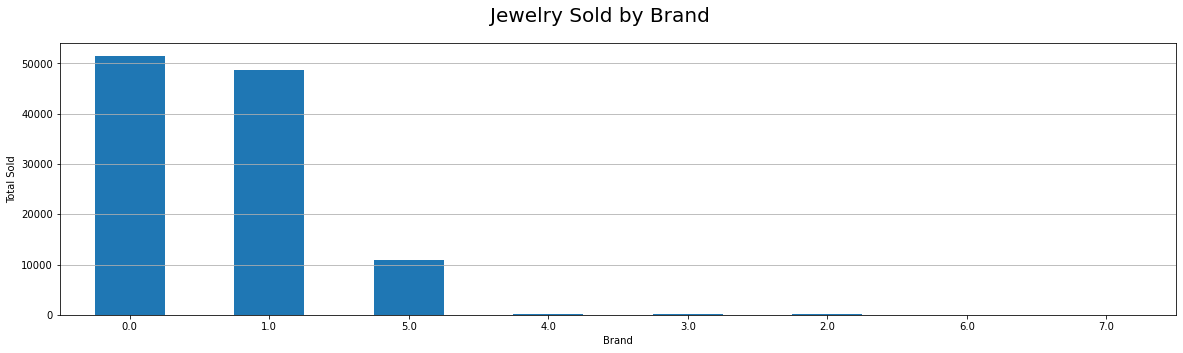

In [311]:
brand = jewelry['brand'].value_counts().drop('nan')

brand.plot(kind = 'bar', xlabel = 'Brand', ylabel = 'Total Sold', rot = 0).grid(axis='y')
plt.suptitle('Jewelry Sold by Brand', fontsize=20)

## Time

### Season

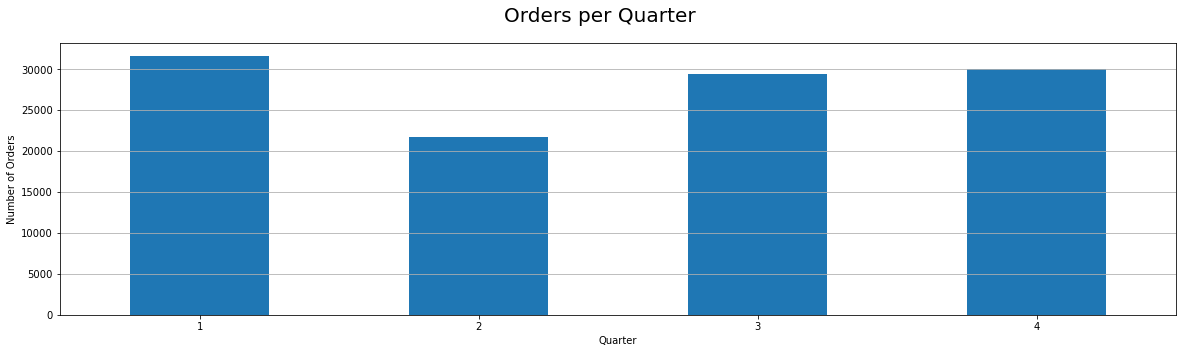

In [318]:
#Seasonal for all years
season = jewelry.groupby([jewelry['event_time'].dt.quarter])['order_id'].count()
season.plot(kind = 'bar', xlabel = 'Quarter', ylabel = 'Number of Orders', rot = 0).grid(axis='y')
plt.suptitle('Orders per Quarter', fontsize=20)
plt.show()
#print(season)

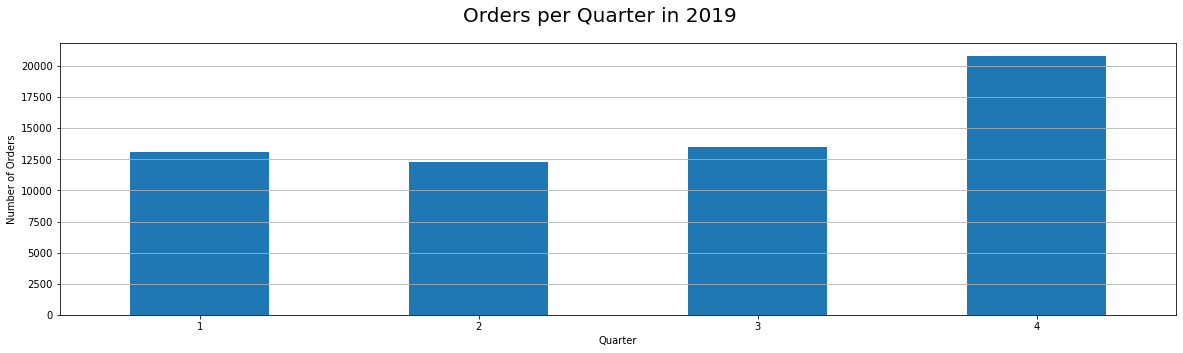

In [319]:
#Seasonal 2019

start2019 = pd.Timestamp('2019-01-01').tz_localize(tz = 'UTC')
end2019 = pd.Timestamp('2020-01-01').tz_localize(tz = 'UTC')

date_mask = (jewelry['event_time'] > start2019) & (jewelry['event_time'] < end2019)
year2019 = jewelry[date_mask]
#print(year2019)
season2019 = year2019.groupby([jewelry['event_time'].dt.quarter])['order_id'].count()
#print(season2019)

season2019.plot(kind = 'bar', xlabel = 'Quarter', ylabel = 'Number of Orders', rot = 0).grid(axis='y')
plt.suptitle('Orders per Quarter in 2019', fontsize=20)
plt.show()

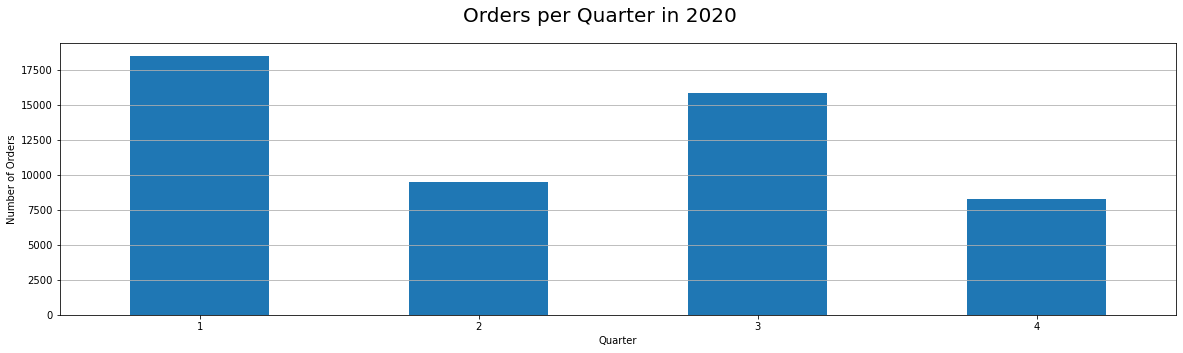

In [320]:
#Seasonal 2020

start2020 = pd.Timestamp('2020-01-01').tz_localize(tz = 'UTC')
end2020 = pd.Timestamp('2021-01-01').tz_localize(tz = 'UTC')

date_mask = (jewelry['event_time'] > start2020) & (jewelry['event_time'] < end2020)
year2020 = jewelry[date_mask]
#print(year2020)
season2020 = year2020.groupby([jewelry['event_time'].dt.quarter])['order_id'].count()
#print(season2020)

season2020.plot(kind = 'bar', xlabel = 'Quarter', ylabel = 'Number of Orders', rot = 0).grid(axis='y')
plt.suptitle('Orders per Quarter in 2020', fontsize=20)
plt.show()

##Month

Text(0.5, 0.98, 'Orders per Month')

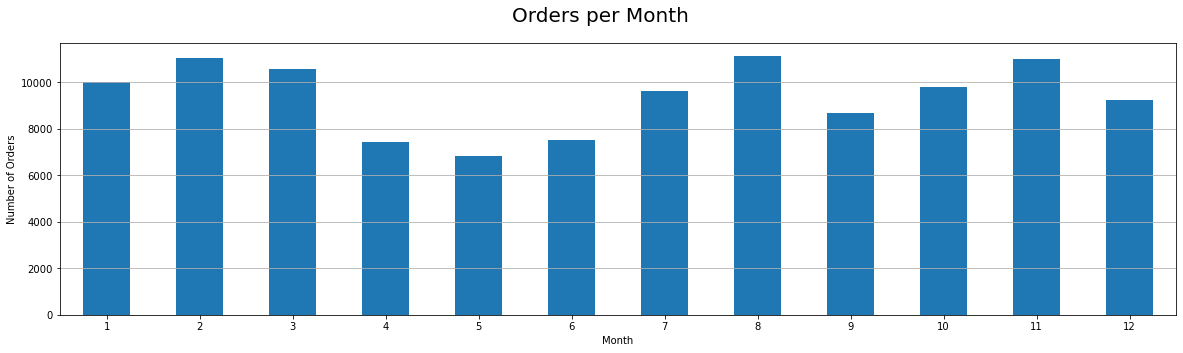

In [333]:
#Overall per month

month = jewelry.groupby([jewelry['event_time'].dt.month])['order_id'].count()
month.plot(kind = 'bar', xlabel = 'Month', ylabel = 'Number of Orders', rot = 0).grid(axis='y')
plt.suptitle('Orders per Month', fontsize=20)
#print(month)

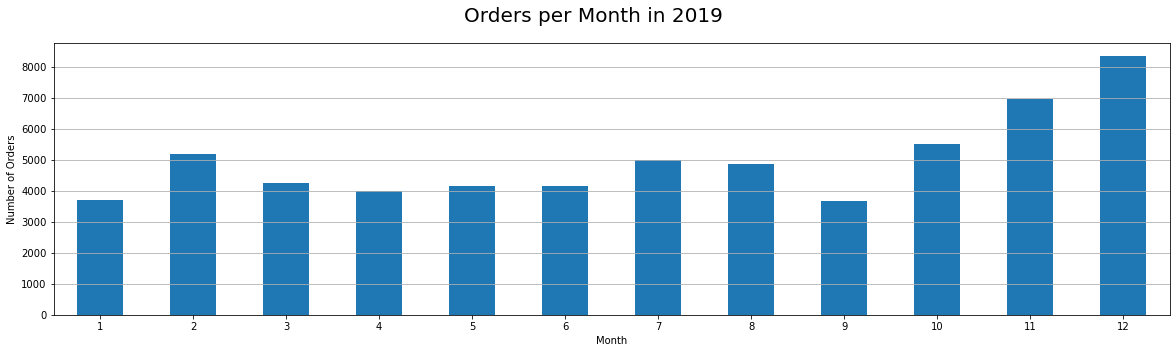

In [334]:
#Monthly 2019

month2019 = year2019.groupby([jewelry['event_time'].dt.month])['order_id'].count()
#print(month2019)

month2019.plot(kind = 'bar', xlabel = 'Month', ylabel = 'Number of Orders', rot = 0).grid(axis='y')
plt.suptitle('Orders per Month in 2019', fontsize=20)
plt.show()

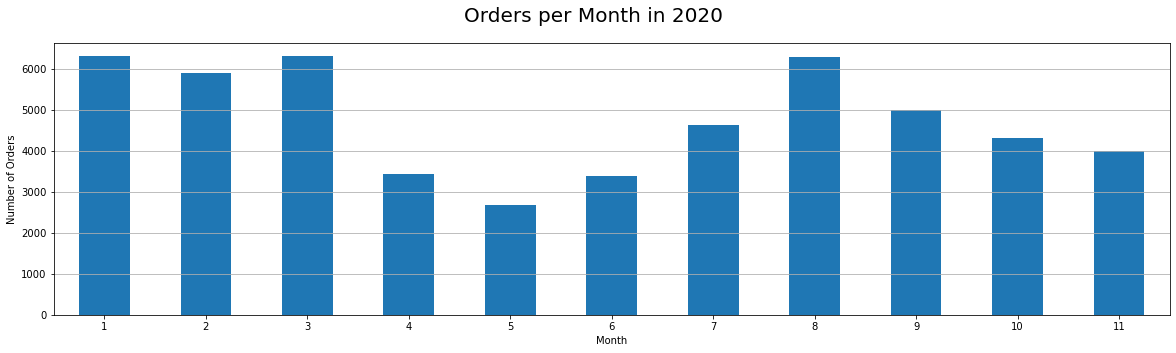

In [332]:
# Monthly 2020

month2020 = year2020.groupby([jewelry['event_time'].dt.month])['order_id'].count()
#print(month2020)

month2020.plot(kind = 'bar', xlabel = 'Month', ylabel = 'Number of Orders', rot = 0).grid(axis='y')
plt.suptitle('Orders per Month in 2020', fontsize=20)
plt.show()

### Day of Week

Text(0.5, 0.98, 'Orders per Day')

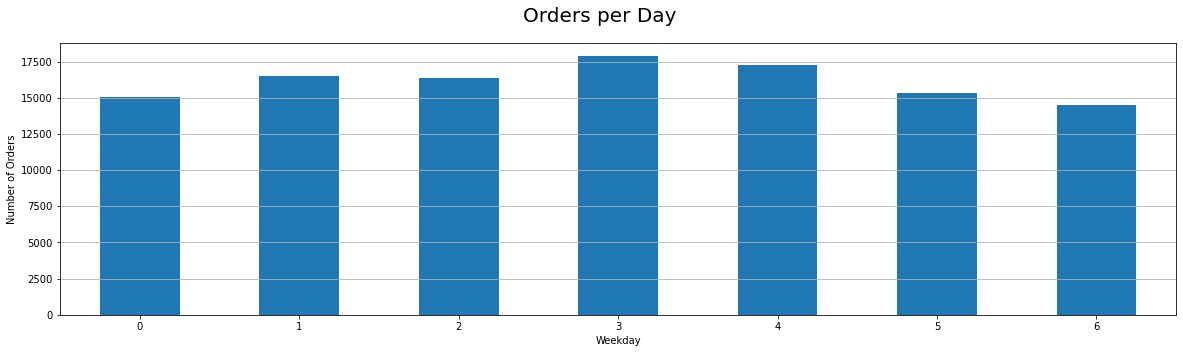

In [177]:
weekday = jewelry.groupby([jewelry['event_time'].dt.weekday])['order_id'].count()
weekday.plot(kind = 'bar', xlabel = 'Weekday', ylabel = 'Number of Orders', rot = 0).grid(axis='y')
plt.suptitle('Orders per Day', fontsize=20)

event_time
0    7911
1    8898
2    8588
3    9546
4    9067
5    8021
6    7701
Name: order_id, dtype: int64


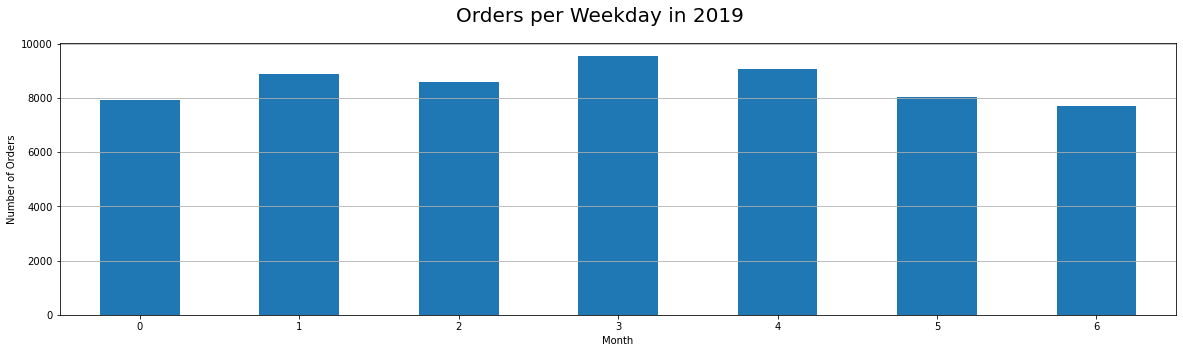

In [335]:
#Daily 2019

weekday2019 = year2019.groupby([jewelry['event_time'].dt.weekday])['order_id'].count()
#print(weekday2019)

weekday2019.plot(kind = 'bar', xlabel = 'Month', ylabel = 'Number of Orders', rot = 0).grid(axis='y')
plt.suptitle('Orders per Weekday in 2019', fontsize=20)
plt.show()

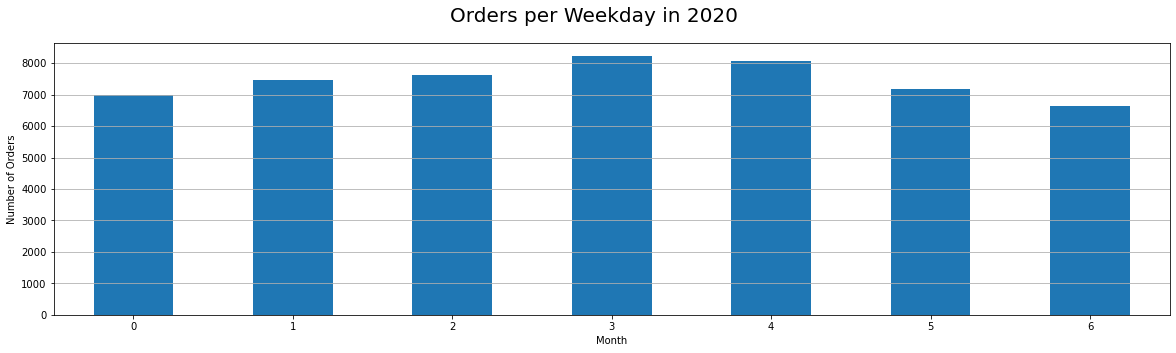

In [337]:
#Daily 2020

weekday2020 = year2020.groupby([jewelry['event_time'].dt.weekday])['order_id'].count()
#print(weekday2020)

weekday2020.plot(kind = 'bar', xlabel = 'Month', ylabel = 'Number of Orders', rot = 0).grid(axis='y')
plt.suptitle('Orders per Weekday in 2020', fontsize=20)
plt.show()

## Insights